In [6]:
%cd /content/drive/MyDrive/Colab Notebooks_TeamShare/open

/content/drive/MyDrive/Colab Notebooks_TeamShare/open


In [7]:
!pwd

/content/drive/MyDrive/Colab Notebooks_TeamShare/open


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max.colwidth', 150)
pd.set_option('display.max.row', 500)

## train_mask  확인

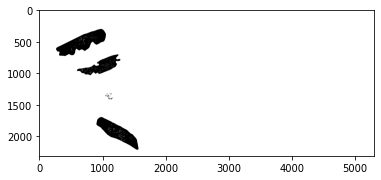

In [6]:
trian_mask_test_img = './train_masks/BC_01_0015.png'
img = cv2.imread(trian_mask_test_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

## 사용자 함수

### 이미지 자르는 사용자 함수

In [ ]:
def Img_Crop(input_dir, input_img_list, crop_size, output_dir, flags):
    print('img_crop 중...') 
    output_dir = input_dir+'_cropped'
#     if ~os.path.exists(output_dir):
#         os.makedirs(output_dir)
    img_list = [os.path.join(input_dir, img_name) for img_name in input_img_list]
    for img in tqdm(img_list):
        cv2_img = cv2.imread(img, flags)
        for row, start_y_pixel in enumerate(range(0, cv2_img.shape[0], crop_size)):
            for col, start_x_pixel in enumerate(range(0, cv2_img.shape[1], crop_size)):
                croped_img = cv2_img[start_y_pixel:start_y_pixel + crop_size, start_x_pixel:start_x_pixel+crop_size]
                cv2.imwrite(f'{output_dir}/{img.split("/")[-1].split(".")[0]}_({row+1:03d},{col+1:03d}).png', croped_img)
    print('완료')

### 명도 측정 사용자 함수

In [ ]:
def Value_Measure(input_dir, input_img_list, crop_size):
    print('Value_Measure 중...')
    df = pd.DataFrame(columns=['img_name', 'value', 'class'])
    df['img_name'] = pd.Series(input_img_list)
    img_list = [os.path.join(input_dir, img_name) for img_name in input_img_list]
    for index, img in tqdm(enumerate(img_list)):
        li = []
        cv2_img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        for i in range(cv2_img.shape[0]):
            for j in range(cv2_img.shape[1]):
                li.append(cv2_img[i,j])
        
        df.loc[index]['value'] = pd.Series(li).value_counts().to_dict()
        
#         if df['class'].iloc[index]
    print('완료')
    return df

## train_masks 이미지 자르기

In [ ]:
# # train masks dir
# train_masks_dir = './train_masks'
# # train masks image list
# train_masks_list = sorted(os.listdir(train_masks_dir))[0:]


# # 크롭하려는 img 폴더
# input_dir = train_masks_dir
# # 크롭하려는 img list
# input_img_list = train_masks_list
# # 크롭할 사이즈
# crop_size = 512
# # 크롬된 img 저장 폴더
# output_dir = './train_masks_cropped'

# # image cropping
# Img_Crop(input_dir, input_img_list, crop_size, output_dir, cv2.IMREAD_GRAYSCALE)

In [ ]:
# len(train_masks_list)

## train_imgs 이미지 자르기

In [ ]:
# # train masks dir
# train_imgs_dir = './train_imgs'
# # train masks image list
# train_imgs_list = sorted(os.listdir(train_imgs_dir))[0:]
# # train_imgs_list = train_masks_list


# # 크롭하려는 img 폴더
# input_dir = train_imgs_dir
# # 크롭하려는 img list
# input_img_list = train_imgs_list
# # 크롭할 사이즈
# crop_size = 512
# # 크롬된 img 저장 폴더
# output_dir = './train_imgs_cropped'

# # image cropping
# Img_Crop(input_dir, input_img_list, crop_size, output_dir, cv2.IMREAD_UNCHANGED)

## 명도 측정

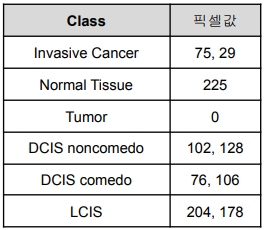![image.png](attachment:image.png)

In [ ]:
# sorted(os.listdir(cropped_train_mask_img_dir))[0]

In [ ]:
# cropped_train_mask_img_dir = './train_masks_cropped'
# cropped_train_mask_img_list = sorted(os.listdir(cropped_train_mask_img_dir))[1:]


# # 명도 측정할 img 폴더
# input_dir = cropped_train_mask_img_dir
# # 명도 측정할 img list
# input_img_list = cropped_train_mask_img_list
# # 크롭할 사이즈
# crop_size = crop_size


# df = Value_Measure(input_dir, input_img_list, crop_size)
# df


In [ ]:
# df = pd.read_pickle('')

In [ ]:
# len(df.value[0].keys())

In [ ]:
# tl=[]
# for i in range(len(df)):
#     if len(df.value[i].keys()) != 1:
#         tl.append(df.img_name[i])
# tl

In [ ]:
# import shutil

# for i in tl:
#     s = './train_masks_cropped/'+i
#     d = './masks_without_white/'+i
#     shutil.copyfile(s, d)

In [ ]:
# for i in tl:
#     s = './train_imgs_cropped/'+i
#     d = './imgs_without_white/'+i
#     shutil.copyfile(s, d)

In [3]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import cv2
from torchvision import transforms, datasets
from torchvision.transforms import ToPILImage
import torch.nn as nn
import torch.utils as utils
import torch.nn.init as init
import torch.utils.data as data
import torchvision.utils as v_utils
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [5]:
!pwd

/content


In [8]:
files1 = [f for f in listdir('./imgs_without_white') if isfile(join('./imgs_without_white', f))]
files1 = sorted(files1,reverse=False)
files2 = [f for f in listdir('./masks_without_white') if isfile(join('./masks_without_white', f))]
files2 = sorted(files2,reverse=False)
test_image_name = [x for x in files1 if x.find("png") != -1]
mask_image_name = [x for x in files2 if x.find("png") != -1]

print('File 개수 확인')
print(len(test_image_name))
print(len(mask_image_name))

File 개수 확인
628
628


torch.Size([3, 512, 512])

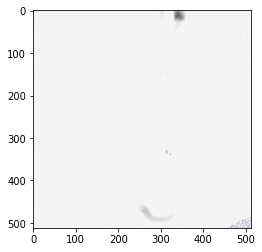

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf

img = tf.keras.preprocessing.image.load_img('./imgs_without_white/' + test_image_name[0],target_size=(512,512))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
# x = x.reshape(1,x.shape[2],x.shape[1],x.shape[0])

from torchvision.transforms import ToTensor
tf_toTensor = ToTensor() 
tf_toTensor(x).shape

In [10]:
from torchvision.transforms import ToTensor
tf_toTensor = ToTensor() 
tf_toTensor(x).shape

torch.Size([3, 512, 512])

In [14]:
image1  = Image.open('./imgs_without_white/' + test_image_name[31]).convert('RGB')
image1_arr  = np.array(image1)
print(image1_arr.shape)
image1 = image1.resize((512, 512))
image1_arr_2  = np.array(image1)
imag1_size = image1_arr_2.shape
print(imag1_size)


(512, 512, 3)
(512, 512, 3)


In [12]:
img_RGB_tensor_from_PIL = tf_toTensor(image1_arr_2)
img_RGB_tensor_from_PIL.shape

torch.Size([3, 512, 512])

In [9]:
print('Deviece 확인')
# device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


loader = transforms.Compose([
    transforms.ToTensor()])  # 토치 텐서로 변환


def image_loader(image_name):
    image = Image.open(image_name)
    # image = image.resize((512, 512))
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

train = []
label = []

for i in range(len(test_image_name)):
    image = image_loader('./imgs_without_white/' + test_image_name[i])
    # image=image.reshape(1,3,512,512)
    train.append(image)

for i in range(len(mask_image_name)):
    image = image_loader('./masks_without_white/' + mask_image_name[i])
    # image=image.reshape(1,1,512,512)
    label.append(image)

Deviece 확인
cuda:0


In [10]:
train[31].shape

torch.Size([1, 3, 512, 512])

In [11]:
print('Train Image -> Tensor 확인')
print(len(train))
print(train[1].size())
print(train[1])
print('Label Image -> Tensor 확인')
print(len(label))
print(label[1].size())
print(label[1])

Train Image -> Tensor 확인
628
torch.Size([1, 3, 512, 512])
tensor([[[[0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          ...,
          [0.9373, 0.8863, 0.6392,  ..., 0.9608, 0.9569, 0.9529],
          [0.9059, 0.8824, 0.8510,  ..., 0.9333, 0.9569, 0.9569],
          [0.8392, 0.8000, 0.8549,  ..., 0.9373, 0.9490, 0.9529]],

         [[0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          ...,
          [0.9137, 0.8784, 0.6118,  ..., 0.9569, 0.9569, 0.9569],
          [0.8824, 0.8706, 0.8235,  ..., 0.9255, 0.9569, 0.9529],
          [0.8078, 0.7412, 0.7843,  ..., 0.9255, 0.9529, 0.9490]],

         [[0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0

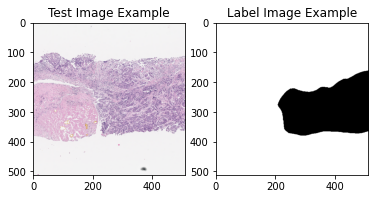

In [12]:
unloader = transforms.ToPILImage()

def imshow1(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
    image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
    image = unloader(image)
    plt.imshow(image)
    

def imshow_gray(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
    image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
    image = unloader(image)
    plt.imshow(image, cmap='gray')
    
    
    
    
test_image_example = plt.subplot(1,2,1)
test_image_example.set_title('Test Image Example')
imshow1(train[-3])

label_image_example = plt.subplot(1,2,2)
label_image_example.set_title('Label Image Example')
imshow_gray(label[-3])

In [ ]:
# from torch.nn.utils.rnn import pad_sequence


# maxlen=512


# image = image_loader('./imgs_without_white/' + 'BC_01_0455_(007,009).png')
# image.shape



# a = torch.zeros(25, 300)
# b = torch.zeros(22, 300)
# c = torch.zeros(15, 300)
# pad_sequence([a, b, c]).size()

In [25]:
# imshow_gray(white_imgs)

In [ ]:
# white_imgs

In [ ]:
# white_imgs = torch.ones(1,3,512,512)
# white_imgs_zero = torch.zeros(1,3,512,512)

In [ ]:
# transforms_Tensor_to_numpy(white_imgs.squeeze(0)) # tensor 1 -> numpy에서의 255

In [ ]:
# transforms_Tensor_to_numpy(white_imgs_zero.squeeze(0) + 243/255)

In [ ]:
# white_imgs = cv2.imread(white_imgs, cv2.IMREAD_GRAYSCALE)
# # white_imgs.to_
# import cv2
# white_imgs.toNu
# plt.imshow(cv2.cvtColor(white_imgs,cv2.COLOR_BGR2GRAY))
# plt.show()

In [ ]:
# white_imgs = white_imgs.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
# white_imgs = white_imgs.squeeze(0)      # 페cv2 배치 차원을 제거 합니다
# image = unloader(white_imgs)
# plt.imshow(image)

In [ ]:
# imshow2(white_masks)

In [ ]:
def padimgs(image):
    while image.shape[2] or image.shape[3] < 512:
        if image.shape[2] != 512:
            v=torch.zeros(1,3,1,512)
            image=torch.cat([image,v],dim=2)
        elif image.shape[3] != 512:
            h = torch.zeros(1,3,512,1)
            image=torch.cat([image,h],dim=3)
    return image

In [26]:
train_batch = []
label_batch = []
batch_size = 2
for i in range(0,len(train),batch_size):
    train_batch.append(torch.cat([train[i],train[i+1]]))

for i in range(0,len(label),2):
    try:
        label_batch.append(torch.cat([label[i],label[i+1]]))
    except:
        pass

In [27]:
print('Batch 개수 확인')
print(len(train_batch))
print(len(label_batch))
print('Batch Tensor 정보 확인')
print(label_batch[0].size())

Batch 개수 확인
314
314
Batch Tensor 정보 확인
torch.Size([2, 1, 512, 512])


In [28]:
train_batch[0].shape

torch.Size([2, 3, 512, 512])

### Model

Model을 단순하게 살펴보면 다음과 같다.  
<img src="https://modulabs-biomedical.github.io/assets/images/posts/2018-04-02-U_Net/u-net_fig_1.png"/>

Model의 Encoder부분인 Contracting Path와 Decoder부분인 Expanding Path부분으로 크게 두가지고 나눌 수 있다. 각각의 특징을 살펴보면 다음과 같다.  
**Contracting Path**  
1. Fully Connected Convolution Networ구조
2. 3 x 3 Convolution을 반복 수행
3. Activation Function: ReLU
4. 2 x 2 Max Pooling: Stride 2를 사용하여 1/2로 Scaling
5. Downsampling 시에는 2배의 Feature Channel사용

Contracting Path로 인하여 64 Channel의 Input Image는 1024의 Channel로서 향상 될 수 있다.  
이러한 늘어난 Encoder의 Output만을 사용하는 것은 전체적인 Image의 Feature를 가져올 수 없다는 단점이 생기게 된다.  
따라서 Upsampling시 **Copy and Crop**을 사용하여 같은 Channel인 Contracting Path의 Feature Map을 붙여서 Input으로 활용하는 것을 알 수 있다.  
>One important modification in our architecture is that in the upsampling
part we have also a large number of feature channels, which allow the network
to propagate context information to higher resolution layers. As a consequence,
the expansive path is more or less symmetric to the contracting path, and yields
a u-shaped architecture

**Expanding Path**  
1. 2 x 2 convolution(up-convolution)
2. Feature channel을 반으로 줄여서 사용
3. **Contracting Path에서 Max-Pooling 되기 전의 Feature map을 Crop하여 Up-Convolution할 때 Concatenation을 수행**
4. 3 x 3 Convolution 반복
5. ReLu사용

여기서 **가장 중요한 것은 AutoEncoder의 구조이지만 Input Image의 전체적인 특성을 가져오기 위하여 Contracting Path의 중간중가 결과물인 Feature Map을 Copy and Crop한다는 것** 이다.

In [13]:
# 자주 쓰는 연산들과 항상 세트로 쓰는 연산들은 편의를 위해 함수로 정의해 놓습니다.

def conv_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def conv_trans_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.ConvTranspose2d(in_dim,out_dim, kernel_size=3, stride=2, padding=1,output_padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def maxpool():
    pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    return pool

def conv_block_2(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        conv_block(in_dim,out_dim,act_fn),
        nn.Conv2d(out_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
    )
    return model   

#### Copy and Crop
개인적으로 **U-net**에서 가장 중요한 부분이다.  
U-net에서 가장 중요한 부분인 **Copy and Crop**을 다음과 같이 구현하였다.  
<code>concat_1 = torch.cat([trans_1,down_4],dim=1)</code><br>
<code>up_1 = self.up_1(concat_1)</code><br>
위의 Code를 보게 되면 Contraction Path에서 뽑아낸 Feature Map을 합쳐서 Input으로 들어가는 것을 확인할 수 있다.

In [14]:
class UnetGenerator(nn.Module):
    def __init__(self,in_dim,out_dim,num_filter):
        super(UnetGenerator,self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_filter = num_filter
        act_fn = nn.LeakyReLU(0.2, inplace=True)

        print("\n------Initiating U-Net------\n")

        self.down_1 = conv_block_2(self.in_dim,self.num_filter,act_fn)
        self.pool_1 = maxpool()
        self.down_2 = conv_block_2(self.num_filter*1,self.num_filter*2,act_fn)
        self.pool_2 = maxpool()
        self.down_3 = conv_block_2(self.num_filter*2,self.num_filter*4,act_fn)
        self.pool_3 = maxpool()
        self.down_4 = conv_block_2(self.num_filter*4,self.num_filter*8,act_fn)
        self.pool_4 = maxpool()

        self.bridge = conv_block_2(self.num_filter*8,self.num_filter*16,act_fn)

        self.trans_1 = conv_trans_block(self.num_filter*16,self.num_filter*8,act_fn)
        self.up_1 = conv_block_2(self.num_filter*16,self.num_filter*8,act_fn)
        self.trans_2 = conv_trans_block(self.num_filter*8,self.num_filter*4,act_fn)
        self.up_2 = conv_block_2(self.num_filter*8,self.num_filter*4,act_fn)
        self.trans_3 = conv_trans_block(self.num_filter*4,self.num_filter*2,act_fn)
        self.up_3 = conv_block_2(self.num_filter*4,self.num_filter*2,act_fn)
        self.trans_4 = conv_trans_block(self.num_filter*2,self.num_filter*1,act_fn)
        self.up_4 = conv_block_2(self.num_filter*2,self.num_filter*1,act_fn)
        
        self.out = nn.Sequential(
            nn.Conv2d(self.num_filter,self.out_dim,3,1,1),
            nn.Tanh(),  #필수는 아님
        )
        
            
    def forward(self,input):
        down_1 = self.down_1(input)
        pool_1 = self.pool_1(down_1)
        down_2 = self.down_2(pool_1)
        pool_2 = self.pool_2(down_2)
        down_3 = self.down_3(pool_2)
        pool_3 = self.pool_3(down_3)
        down_4 = self.down_4(pool_3)
        pool_4 = self.pool_4(down_4)

        bridge = self.bridge(pool_4)

        trans_1 = self.trans_1(bridge)
        concat_1 = torch.cat([trans_1,down_4],dim=1)
        up_1 = self.up_1(concat_1)
        trans_2 = self.trans_2(up_1)
        concat_2 = torch.cat([trans_2,down_3],dim=1)
        up_2 = self.up_2(concat_2)
        trans_3 = self.trans_3(up_2)
        concat_3 = torch.cat([trans_3,down_2],dim=1)
        up_3 = self.up_3(concat_3)
        trans_4 = self.trans_4(up_3)
        concat_4 = torch.cat([trans_4,down_1],dim=1)
        up_4 = self.up_4(concat_4)
        out = self.out(up_4)
        return out

#### Loss and Optimizer
**Optimizer**  
Optimizer의 경우 SGD를 사용하고 **Batch size를 크게해서 학습시키는 것 보다 Input Tile의 size를 크게 주는 방법을 선택**하였다.  
이에 관련된 이유는 Image를 일정 크기(Patch)로서 자르게 되는데 너무 작게 자르게 되는 경우 Image자체의 Context의 의미가 없어지므로 이러한 선택을 하였다.  
이러한 **Batch Size가 작기 때문에, 이를 보안하고자 momentum의 값을 0.99를 주어서 과거의 겂들을 더 많이 반영하게 하여 학습이 진행하도록 하였다.**  

**Loss Function**  
Biomedical Image의 특성상 Cell이 서로 인접하여서 구분하기 힘든 특징이 있다.  
각각의 Cell과 배경은 잘 구분되는 특징은 있지만, 각각의 Cell이 구분되지 않는 특징이 존재하게 된다.  

이러한 특성 때문에 서로 붙어있는 물체를 쉽게 합치고 떨어뜨리기 위하여, Weight map을 추가하여 Network의 Output을 결정하게 된다.
- $d_1(x)$: 가장 근접한 Cell의 경계와의 거리
- $d_2(x)$: 두번째로 근접한 Cell의 경계와의 거리
$$w(x) = w_c(x) + w_0 * exp(-\frac{(d_1(x) + d_2(x))^2}{2\alpha^2})$$

이러한 Weight Map을 통하여 Loss Function을 정의하게 되면 Cross Entropy를 사용할 시 다음과 같이 나타낼 수 있다.
$$E = \sum_{x \in \Omega}w(x)log(p_{l(x)}(x))$$

위와 같은 결과로서 얻는 Image의 변환은 아래와 같다.
<img width="600" height="250" role="presentation" src="http://openresearch.ai/uploads/default/original/1X/5f404882292f729534593e970b891346fe270f10.png">

**위의 사진에서도 알 수 있듯이 Cell이 인접해 있으면, 각 셀과 배경을 구분하도록 둘 사이에 배경으로 인식할 틈을 만들겠다는 의미이다.**

#### 간단한 $w_c(x)$ 확인

img_numpy Check
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
After Kernel Check
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


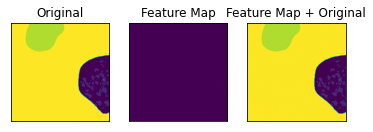

In [15]:
def imshow2(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
    image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
    image = unloader(image)
    return image

img = imshow2(label[31])
img_numpy = np.array(img)
print('img_numpy Check')
print(img_numpy)


kernel = np.ones((3,3),np.uint8)
result = cv2.morphologyEx(img_numpy/255, cv2.MORPH_TOPHAT, kernel)

print('After Kernel Check')
print(result)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(result),plt.title('Feature Map')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img+result),plt.title('Feature Map + Original')
plt.xticks([]),plt.yticks([])
plt.show()

#### Hyper Parameter 및 Model, Loss 선언

원래 Loss는 아래와 같다.
**Weight Map**  
- $d_1(x)$: 가장 근접한 Cell의 경계와의 거리
- $d_2(x)$: 두번째로 근접한 Cell의 경계와의 거리
$$w(x) = w_c(x) + w_0 * exp(-\frac{(d_1(x) + d_2(x))^2}{2\alpha^2})$$

**Loss Function**  
이러한 Weight Map을 통하여 Loss Function을 정의하게 되면 Cross Entropy를 사용할 시 다음과 같이 나타낼 수 있다.
$$E = \sum_{x \in \Omega}w(x)log(p_{l(x)}(x))$$

현재 **Weight Map**에서 가장 인접한 Cell과의 거리를 어떻게 해야할 지 몰라서 간단한 **Weight Map**만 구하였다.  
즉 식은 아래와 같이 바뀌게 된다.  
$$w(x) = w_c(x) + w_0 * exp(-\frac{(d_1(x) + d_2(x))^2}{2\alpha^2})$$

또한 Loss Function도 MSE를 사용하여 아래와 같이 식이 변하게 된다.  
$$E = \sum{(y - (\hat{y} + w_c(x)))^2}$$

**나중에 OpenCV를 공부후 각각의 Cell사이의 거리를 구할 수 있게 되면 다시 구현하는 것을 목표로 한다.**  

In [31]:
device

device(type='cuda', index=0)

In [19]:
img_size = 512
in_dim = 3
out_dim = 1
num_filters = 64
# num_epoch = 3000
num_epoch = 300

lr = 0.001

# 앞서 정의한대로 vGG 클래스를 인스턴스화 하고 지정한 장치에 올립니다.
model = UnetGenerator(in_dim=in_dim,out_dim=out_dim,num_filter=num_filters).to(device)

# 손실함수 및 최적화함수를 설정합니다.
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.99)


------Initiating U-Net------



#### Model Trainning

In [16]:
device


device(type='cuda', index=0)

In [36]:
from tqdm import tqdm

In [42]:
def imshow2(tensor, title=None):
    image = tensor.cpu().clone() # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
    # image = tensor.to(device).clone()
    image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
    image = unloader(image)
    return image

for i in range(num_epoch):
    for j in tqdm(range(len(train_batch))):
        x = train_batch[j]
        y_= label_batch[j]
        
        optimizer.zero_grad()
        output = model.forward(x)
        
        img = imshow2(output[0])
        img_numpy = np.array(img)
        img_2 = imshow2(output[1])
        img_numpy_2 = np.array(img_2)
        kernel = np.ones((3,3),np.uint8)
        result = cv2.morphologyEx(img_numpy/255, cv2.MORPH_TOPHAT, kernel)
        result_2 = cv2.morphologyEx(img_numpy_2/255, cv2.MORPH_TOPHAT, kernel)
        
        
        result = torch.from_numpy(result).unsqueeze(0).to(device,torch.float)
        result_2 = torch.from_numpy(result_2).unsqueeze(0).to(device,torch.float)
        
        
        final_result = torch.cat([result,result_2],0).view([2,1,512,512])
        
      
        loss = loss_func((output+final_result),y_)
        loss.backward()
        
        optimizer.step()
    if i % 50 ==0:
        print(loss.item())

100%|██████████| 314/314 [00:23<00:00, 13.29it/s]


0.13052402436733246


100%|██████████| 314/314 [00:23<00:00, 13.33it/s]


0.13082526624202728


100%|██████████| 314/314 [00:23<00:00, 13.34it/s]


0.13082489371299744


100%|██████████| 314/314 [00:23<00:00, 13.50it/s]


0.13082504272460938


100%|██████████| 314/314 [00:23<00:00, 13.55it/s]


0.13082490861415863


100%|██████████| 314/314 [00:23<00:00, 13.29it/s]


0.13082462549209595


100%|██████████| 314/314 [00:23<00:00, 13.42it/s]


#### Test 결과 확인

In [66]:
!pwd

/content/drive/MyDrive/Colab Notebooks_TeamShare/open


해야될것
1. 마스킹 사진 세이브
2. 모델 세이브
3. 짤라진 마스킹 사진들 라벨링

In [21]:
model_name = 'Unet_version_1.pth'
model = UnetGenerator(in_dim=in_dim,out_dim=out_dim,num_filter=num_filters).to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks_TeamShare/open/'+ model_name))


------Initiating U-Net------



<All keys matched successfully>

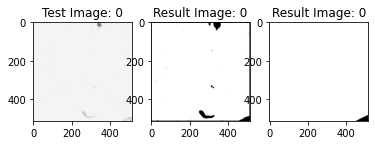

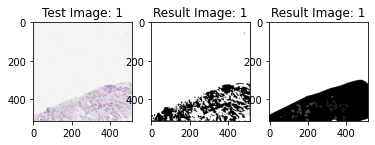

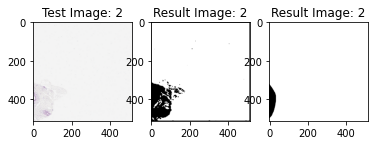

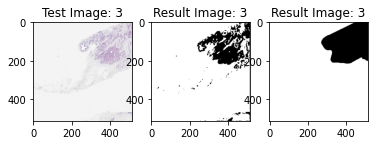

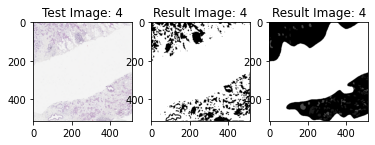

In [96]:
test = []
masks = []
output = []
for i in range(628):
    # './imgs_without_white/' + test_image_name[31]
    # image = image_loader('./Data/test/' + str(i) + '.png')
    image = image_loader('./imgs_without_white/' + test_image_name[i])
    mask = image_loader('./masks_without_white/' + test_image_name[i])
    
    test.append(image)
    masks.append(mask)



with torch.no_grad():
    for i in range(len(test)):
        output.append(model.forward(test[i]))

        # if i % 10 == 0:
            # print(loss.item())
        
for i in range(5):
    test_image_example = plt.subplot(1,3,1)
    test_image_example.set_title('Test Image: ' + str(i))
    imshow1(test[i])
    
    result_image_example = plt.subplot(1,3,2)
    result_image_example.set_title('Result Image: ' + str(i))
    imshow_gray(-output[i])

    result_image_example_real = plt.subplot(1,3,3)
    result_image_example_real.set_title('Result Image: ' + str(i))
    imshow_gray(masks[i])
    
    plt.show()

In [111]:
!pwd

/content/drive/MyDrive/Colab Notebooks_TeamShare/open


In [121]:
li = [1,2.3,5.1]
li_TF=list(map(lambda x: int(x),li))
li_TF

[1, 2, 5]

In [134]:
inst = output[0].cpu().clone()
inst.numpy()

array([[[[0.99999946, 1.        , 1.        , ..., 1.        ,
          1.        , 0.99999994],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [1.        , 1.        , 1.        , ..., 1.        ,
          1.        , 1.        ],
         [0.9999984 , 1.        , 1.        , ..., 1.        ,
          1.        , 0.9999999 ]]]], dtype=float32)

In [135]:
len(output)
# inst = output[0].cpu().clone()
# inst.numpy()
x = list(map(lambda x: x.cpu().clone().numpy(),output))
np.save('test.npy',x)
# np.array(output)

현재 U-Net의 **Loss Function을 논문에서 제시한 Weight Cross Entropy가 아닌 MSE로 구현하였기 때문에 Loss는 적어도 만족하지 못한 결과를 얻었다.**
OpenCv를 공부 후 Image처리를 통하여 다시 Loss Function을 구현 후 확인해 봐야하는 사항이다.

In [93]:
%cd /content/drive/MyDrive/Colab Notebooks_TeamShare/open/masks_total_slide

/content/drive/MyDrive/Colab Notebooks_TeamShare/open/masks_total_slide


In [94]:
!pwd

/content/drive/MyDrive/Colab Notebooks_TeamShare/open/masks_total_slide


In [97]:
# model_name = 'Unet_version_1.pth'
# torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks_TeamShare/open/'+ model_name)

In [66]:
model = UnetGenerator(in_dim=in_dim,out_dim=out_dim,num_filter=num_filters).to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks_TeamShare/open/'+ model_name))


------Initiating U-Net------



<All keys matched successfully>

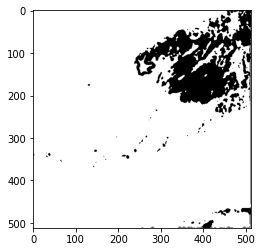

In [100]:
imshow_gray(-output[3])

In [98]:
-output[3]

tensor([[[[-0.9999, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9999, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]]],
       device='cuda:0')

In [104]:
f'masked_epoch(300)_{test_image_name[i]}'

'masked_epoch(300)_BC_01_0015_(002,001).png'

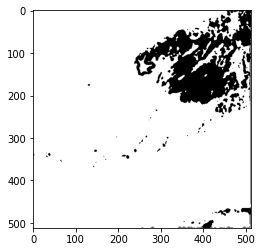

In [109]:
from torchvision.utils import save_image
from torchvision.transforms import ToTensor, ToPILImage
tf_toPILImage = ToPILImage() 


i = 3
instance = output[i]
image = instance.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
image = image.squeeze(0) 

# save_image(image, f'masked_epoch(300)_{test_image_name[i]}')
# arr = cv2.imread(f'masked_epoch(300)_{test_image_name[i]}')
# plt.imshow(arr)
# plt.show()

image = unloader(-image)
plt.imshow(image, cmap='gray')
    

# output.append(model.forward(test[i]))
# instance = model.forward(test[i])
# instance = output[i]
# image = instance.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
# image = image.squeeze(0)  
# image = unloader(image)
# image = unloader(-image)
# image = image * 255
# image = tf_toPILImage(image)
# image

# save_image(image, f'masked_epoch(300)_{test_image_name[i]}')
# arr=cv2.imread(f'masked_epoch(300)_{test_image_name[i]}')
# plt.imshow(arr)


#     # 페이크 배치 차원을 제거 합니다
image = unloader(-image)
x = 512 / 72
# x = 10
plt.figure(figsize=(x,x),dpi=72)
plt.axis('off')
plt.imshow(image,cmap='gray')
plt.savefig(f'masked_epoch(300)_{test_image_name[i]}')


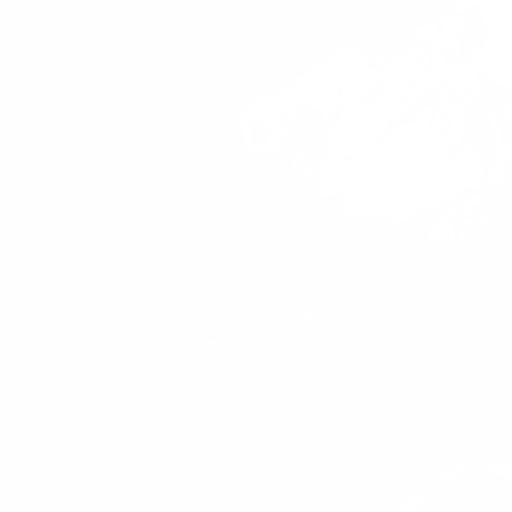

In [89]:
pimage

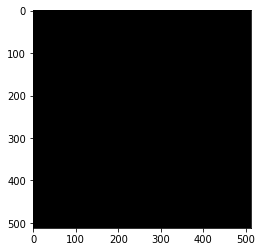

In [79]:
arr=cv2.imread(f'masked_epoch(300)_{test_image_name[i]}')
plt.imshow(arr)

In [114]:
%cd /content/drive/MyDrive/Colab Notebooks_TeamShare/open

/content/drive/MyDrive/Colab Notebooks_TeamShare/open


In [29]:
instance

NameError: ignored

In [30]:
image = instance.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
image = unloader(-image)
plt.imshow(image,cmap='gray')
x = 512 / 72
plt.figure(figsize=(x,x),dpi=72)
plt.axis('off')
plt.savefig('test_grayscale.png')

NameError: ignored

In [106]:
"instance

tensor([[[[0.9997, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9999],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [0.9996, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9998]]]],
       device='cuda:0')

In [95]:

with torch.no_grad():
    for i in range(len(test)):
        # output.append(model.forward(test[i]))
        instance=model.forward(test[i])
        image = instance.cpu().clone()  # 텐서의 값에 변화가 적용되지 않도록 텐서를 복제합니다
        image = image.squeeze(0)      # 페이크 배치 차원을 제거 합니다
        image = unloader(image)
        plt.show(image)
        plt.savefig(f'masked_epoch(300)_{test_image_name[i]}')
        
        if i % 100 == 0:
            print(loss.item())

0.130824476480484


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.130824476480484


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.130824476480484


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.130824476480484


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.130824476480484


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.130824476480484


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.130824476480484


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import csv

list_name = ["가방", "스타크래프트", "핸드폰", "손전등", "스위치"]

with open("filename.csv", 'w') as file:
  writer = csv.writer(file)
  writer.writerow(output)

# test

In [ ]:
img_test_1 = cv2.imread('../../open//train_masks/BC_01_0015.png')
plt.imshow(img_test_1)
plt.show()
print(img_test_1[1000,900])

plt.imshow(img_test_1, cmap='gray')
plt.show()
print(img_test_1[1000,900])

plt.imshow(cv2.cvtColor(img_test_1, cv2.COLOR_BGR2GRAY))
plt.show()
print(img_test_2[1000,900])

img_test_2 = cv2.imread('../../open//train_masks/BC_01_0015.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_test_2)
plt.show()
print(img_test_2[1000,900])

plt.imshow(img_test_2, cmap='gray')
plt.show()
print(img_test_2[1000,900])

# cv2.imwrite('./test_1.png', img_test)